**SETUP ENVIRONMENT DAN IMPORT LIBRARY**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Setting visual style
sns.set(style="whitegrid")

In [4]:
file_path = '/content/Kuisioner_Mandalika(Responses).csv'
df = pd.read_csv(file_path)

df.head()


,Nama,Status,Umur,Jenis Kelamin,Tanya1,Tanya2,Tanya3,Tanya4,Tanya5,Tanya6,Tanya7,Hasil
0,Vinca,Mahasiswa/Mahasiswi,20,Perempuan,100,100,100,100,50,100,100,1
1,Gregorius Aldonis K,Mahasiswa/Mahasiswi,21,Laki-Laki,100,100,100,100,50,100,100,1
2,Devani Putri Rizki Yuliani,Mahasiswa/Mahasiswi,20,Perempuan,100,100,100,100,50,100,100,1
3,Ryan,Mahasiswa/Mahasiswi,20,Laki-Laki,100,100,100,100,100,100,100,1
4,Gavra,Mahasiswa/Mahasiswi,22,Laki-Laki,100,100,100,100,50,100,100,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nama           38 non-null     object
 1    Status        38 non-null     object
 2   Umur           38 non-null     int64 
 3   Jenis Kelamin  38 non-null     object
 4   Tanya1         38 non-null     int64 
 5   Tanya2         38 non-null     int64 
 6   Tanya3         38 non-null     int64 
 7   Tanya4         38 non-null     int64 
 8   Tanya5         38 non-null     int64 
 9   Tanya6         38 non-null     int64 
 10  Tanya7         38 non-null     int64 
 11  Hasil          38 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 3.7+ KB


In [8]:
df.describe()

,Umur,Tanya1,Tanya2,Tanya3,Tanya4,Tanya5,Tanya6,Tanya7,Hasil
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000
mean,21.921053,94.736842,94.736842,93.421053,92.105263,60.526316,92.105263,100.0,0.842105
std,5.542863,15.550587,15.550587,17.128499,18.476851,20.657748,18.476851,0.0,0.369537
min,18.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,100.0,0.000000
25%,20.000000,100.000000,100.000000,100.000000,100.000000,50.000000,100.000000,100.0,1.000000
50%,21.000000,100.000000,100.000000,100.000000,100.000000,50.000000,100.000000,100.0,1.000000
75%,22.000000,100.000000,100.000000,100.000000,100.000000,50.000000,100.000000,100.0,1.000000
max,54.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,1.000000


**MENGECEK DAN MEMBERSIHKAN DATA YANG TIDAK VALID**

In [9]:
# Mengecek apakah ada data yang null atau kosong
print("Jumlah nilai null per kolom:\n", df.isnull().sum())

Jumlah nilai null per kolom:
 Nama             0
 Status          0
Umur             0
Jenis Kelamin    0
Tanya1           0
Tanya2           0
Tanya3           0
Tanya4           0
Tanya5           0
Tanya6           0
Tanya7           0
Hasil            0
dtype: int64


In [10]:
# Menghapus baris yang memiliki data kosong
df_cleaned = df.dropna()

In [11]:
# Mengecek apakah ada duplikasi baris
duplicate_rows = df_cleaned[df_cleaned.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

Jumlah baris duplikat: 0


In [12]:
# Menghapus baris yang duplikat
df_cleaned = df_cleaned.drop_duplicates()

In [20]:
# Melihat hasil data yang sudah bersih
df_cleaned.head()

,Nama,Status,Umur,Jenis Kelamin,Tanya1,Tanya2,Tanya3,Tanya4,Tanya5,Tanya6,Tanya7,Hasil
0,Vinca,Mahasiswa/Mahasiswi,20,Perempuan,100,100,100,100,50,100,100,1
1,Gregorius Aldonis K,Mahasiswa/Mahasiswi,21,Laki-Laki,100,100,100,100,50,100,100,1
2,Devani Putri Rizki Yuliani,Mahasiswa/Mahasiswi,20,Perempuan,100,100,100,100,50,100,100,1
3,Ryan,Mahasiswa/Mahasiswi,20,Laki-Laki,100,100,100,100,100,100,100,1
4,Gavra,Mahasiswa/Mahasiswi,22,Laki-Laki,100,100,100,100,50,100,100,1


**ANALISIS DESKRIPTIF**

In [22]:
print(df_cleaned.columns)

Index(['Nama', ' Status', 'Umur ', 'Jenis Kelamin', 'Tanya1', 'Tanya2',
       'Tanya3', 'Tanya4', 'Tanya5', 'Tanya6', 'Tanya7', 'Hasil'],
      dtype='object')


In [23]:
# Menghapus spasi tambahan dari nama kolom
df_cleaned.columns = df_cleaned.columns.str.strip()

# Memeriksa nama kolom setelah penghapusan spasi
print(df_cleaned.columns)

# Pastikan kolom 'Umur' dan 'Hasil' diubah menjadi tipe data numerik jika belum
df_cleaned['Umur'] = pd.to_numeric(df_cleaned['Umur'], errors='coerce')
df_cleaned['Hasil'] = pd.to_numeric(df_cleaned['Hasil'], errors='coerce')


Index(['Nama', 'Status', 'Umur', 'Jenis Kelamin', 'Tanya1', 'Tanya2', 'Tanya3',
       'Tanya4', 'Tanya5', 'Tanya6', 'Tanya7', 'Hasil'],
      dtype='object')
Rata-rata umur berdasarkan jenis kelamin:
 Jenis Kelamin
Laki-Laki    21.0000
Perempuan    23.1875
Name: Umur, dtype: float64
Distribusi peserta berdasarkan jenis kelamin:
 Jenis Kelamin
Laki-Laki    22
Perempuan    16
Name: count, dtype: int64
Jumlah peserta yang berhasil berdasarkan umur:
 Umur
18     1
19     3
20     6
21    11
22     7
23     2
25     1
54     1
Name: Hasil, dtype: int64


In [24]:
# Rata-rata usia berdasarkan jenis kelamin
avg_age_by_gender = df_cleaned.groupby('Jenis Kelamin')['Umur'].mean()
print("Rata-rata umur berdasarkan jenis kelamin:\n", avg_age_by_gender)

# Distribusi peserta berdasarkan jenis kelamin
gender_distribution = df_cleaned['Jenis Kelamin'].value_counts()
print("Distribusi peserta berdasarkan jenis kelamin:\n", gender_distribution)

# Jumlah peserta yang berhasil (kolom Hasil) berdasarkan umur
successful_by_age = df_cleaned.groupby('Umur')['Hasil'].sum()
print("Jumlah peserta yang berhasil berdasarkan umur:\n", successful_by_age)

Rata-rata umur berdasarkan jenis kelamin:
 Jenis Kelamin
Laki-Laki    21.0000
Perempuan    23.1875
Name: Umur, dtype: float64
Distribusi peserta berdasarkan jenis kelamin:
 Jenis Kelamin
Laki-Laki    22
Perempuan    16
Name: count, dtype: int64
Jumlah peserta yang berhasil berdasarkan umur:
 Umur
18     1
19     3
20     6
21    11
22     7
23     2
25     1
54     1
Name: Hasil, dtype: int64


**VISUALISASI**

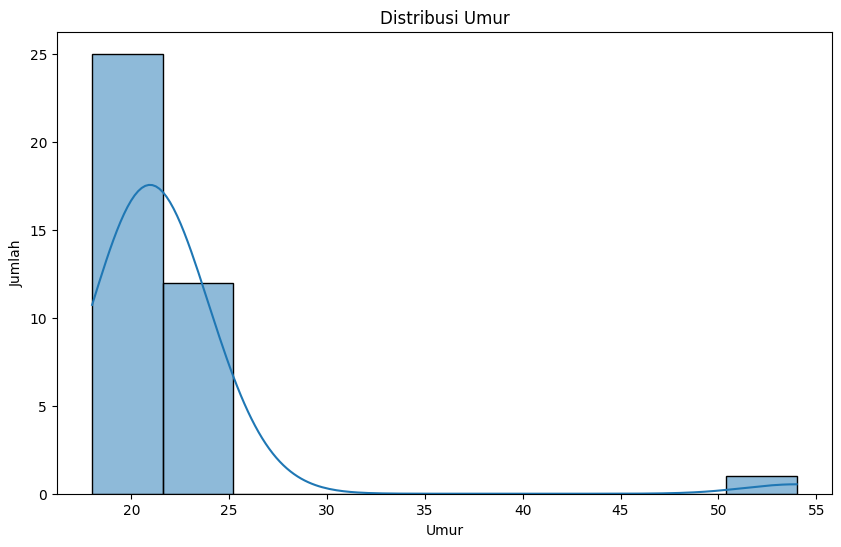

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Umur'], kde=True, bins=10)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()


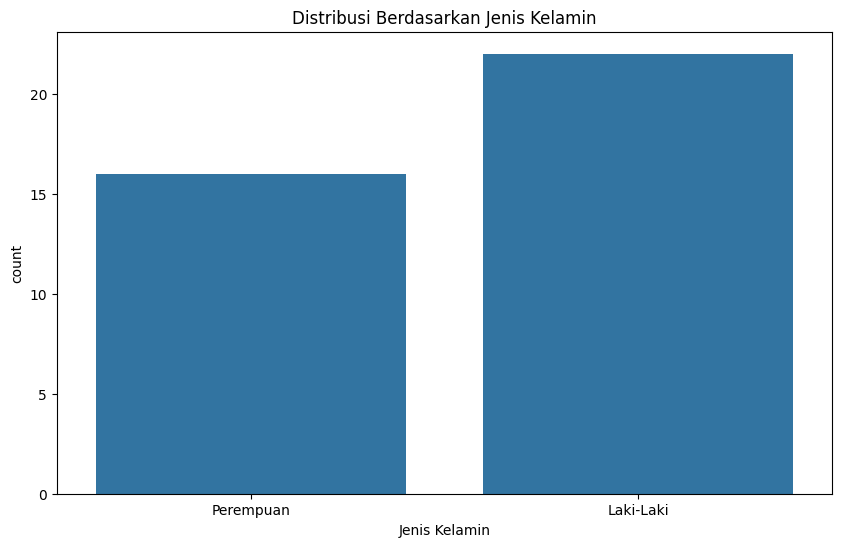

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Jenis Kelamin', data=df_cleaned)
plt.title('Distribusi Berdasarkan Jenis Kelamin')
plt.show()

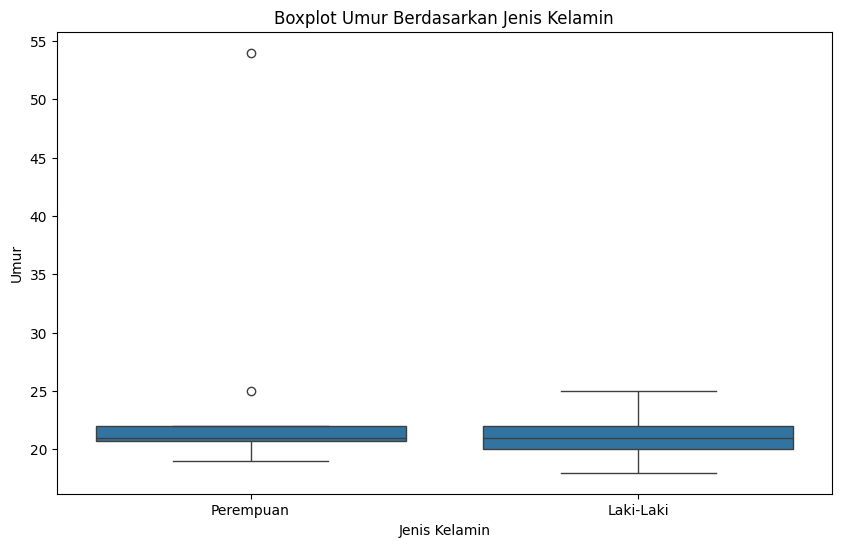

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Jenis Kelamin', y='Umur', data=df_cleaned)
plt.title('Boxplot Umur Berdasarkan Jenis Kelamin')
plt.show()